In [1]:
# import dependencies
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
IMAGES_PATH = "images"
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## 1. Load the Data

In [3]:
train_values_path = os.path.join('..', 'Datasets' ,'train_values.csv')
X = pd.read_csv(train_values_path, index_col='building_id')

In [4]:
X.head()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
building_id,,,,,,,,,,,,,,,,,,,,,
802906,6,487,12198,2,30,6,5,t,r,n,...,0,0,0,0,0,0,0,0,0,0
28830,8,900,2812,2,10,8,7,o,r,n,...,0,0,0,0,0,0,0,0,0,0
94947,21,363,8973,2,10,5,5,t,r,n,...,0,0,0,0,0,0,0,0,0,0
590882,22,418,10694,2,10,6,5,t,r,n,...,0,0,0,0,0,0,0,0,0,0
201944,11,131,1488,3,30,8,9,t,r,n,...,0,0,0,0,0,0,0,0,0,0


In [5]:
train_labels_path = os.path.join('..', 'Datasets' ,'train_labels.csv')
y = pd.read_csv(train_labels_path, index_col='building_id')

In [6]:
y.head()

,damage_grade
building_id,
802906,3
28830,2
94947,3
590882,2
201944,3


In [7]:
# combine the values and labels
earthquake_damage_df = X.join(y)
earthquake_damage_df.head()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
building_id,,,,,,,,,,,,,,,,,,,,,
802906,6,487,12198,2,30,6,5,t,r,n,...,0,0,0,0,0,0,0,0,0,3
28830,8,900,2812,2,10,8,7,o,r,n,...,0,0,0,0,0,0,0,0,0,2
94947,21,363,8973,2,10,5,5,t,r,n,...,0,0,0,0,0,0,0,0,0,3
590882,22,418,10694,2,10,6,5,t,r,n,...,0,0,0,0,0,0,0,0,0,2
201944,11,131,1488,3,30,8,9,t,r,n,...,0,0,0,0,0,0,0,0,0,3


## 2. Look at the Data Structure

In [8]:
earthquake_damage_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 260601 entries, 802906 to 747594
Data columns (total 39 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   geo_level_1_id                          260601 non-null  int64 
 1   geo_level_2_id                          260601 non-null  int64 
 2   geo_level_3_id                          260601 non-null  int64 
 3   count_floors_pre_eq                     260601 non-null  int64 
 4   age                                     260601 non-null  int64 
 5   area_percentage                         260601 non-null  int64 
 6   height_percentage                       260601 non-null  int64 
 7   land_surface_condition                  260601 non-null  object
 8   foundation_type                         260601 non-null  object
 9   roof_type                               260601 non-null  object
 10  ground_floor_type                       260601 non-null 

In [9]:
earthquake_damage_df['land_surface_condition'].value_counts()

land_surface_condition
t    216757
n     35528
o      8316
Name: count, dtype: int64

In [10]:
earthquake_damage_df['foundation_type'].value_counts()

foundation_type
r    219196
w     15118
u     14260
i     10579
h      1448
Name: count, dtype: int64

In [11]:
earthquake_damage_df['roof_type'].value_counts()

roof_type
n    182842
q     61576
x     16183
Name: count, dtype: int64

In [12]:
earthquake_damage_df['ground_floor_type'].value_counts()

ground_floor_type
f    209619
x     24877
v     24593
z      1004
m       508
Name: count, dtype: int64

In [13]:
earthquake_damage_df['other_floor_type'].value_counts()

other_floor_type
q    165282
x     43448
j     39843
s     12028
Name: count, dtype: int64

In [14]:
earthquake_damage_df['position'].value_counts()

position
s    202090
t     42896
j     13282
o      2333
Name: count, dtype: int64

In [15]:
earthquake_damage_df['plan_configuration'].value_counts()

plan_configuration
d    250072
q      5692
u      3649
s       346
c       325
a       252
o       159
m        46
n        38
f        22
Name: count, dtype: int64

Saving figure attribute_histogram_plots


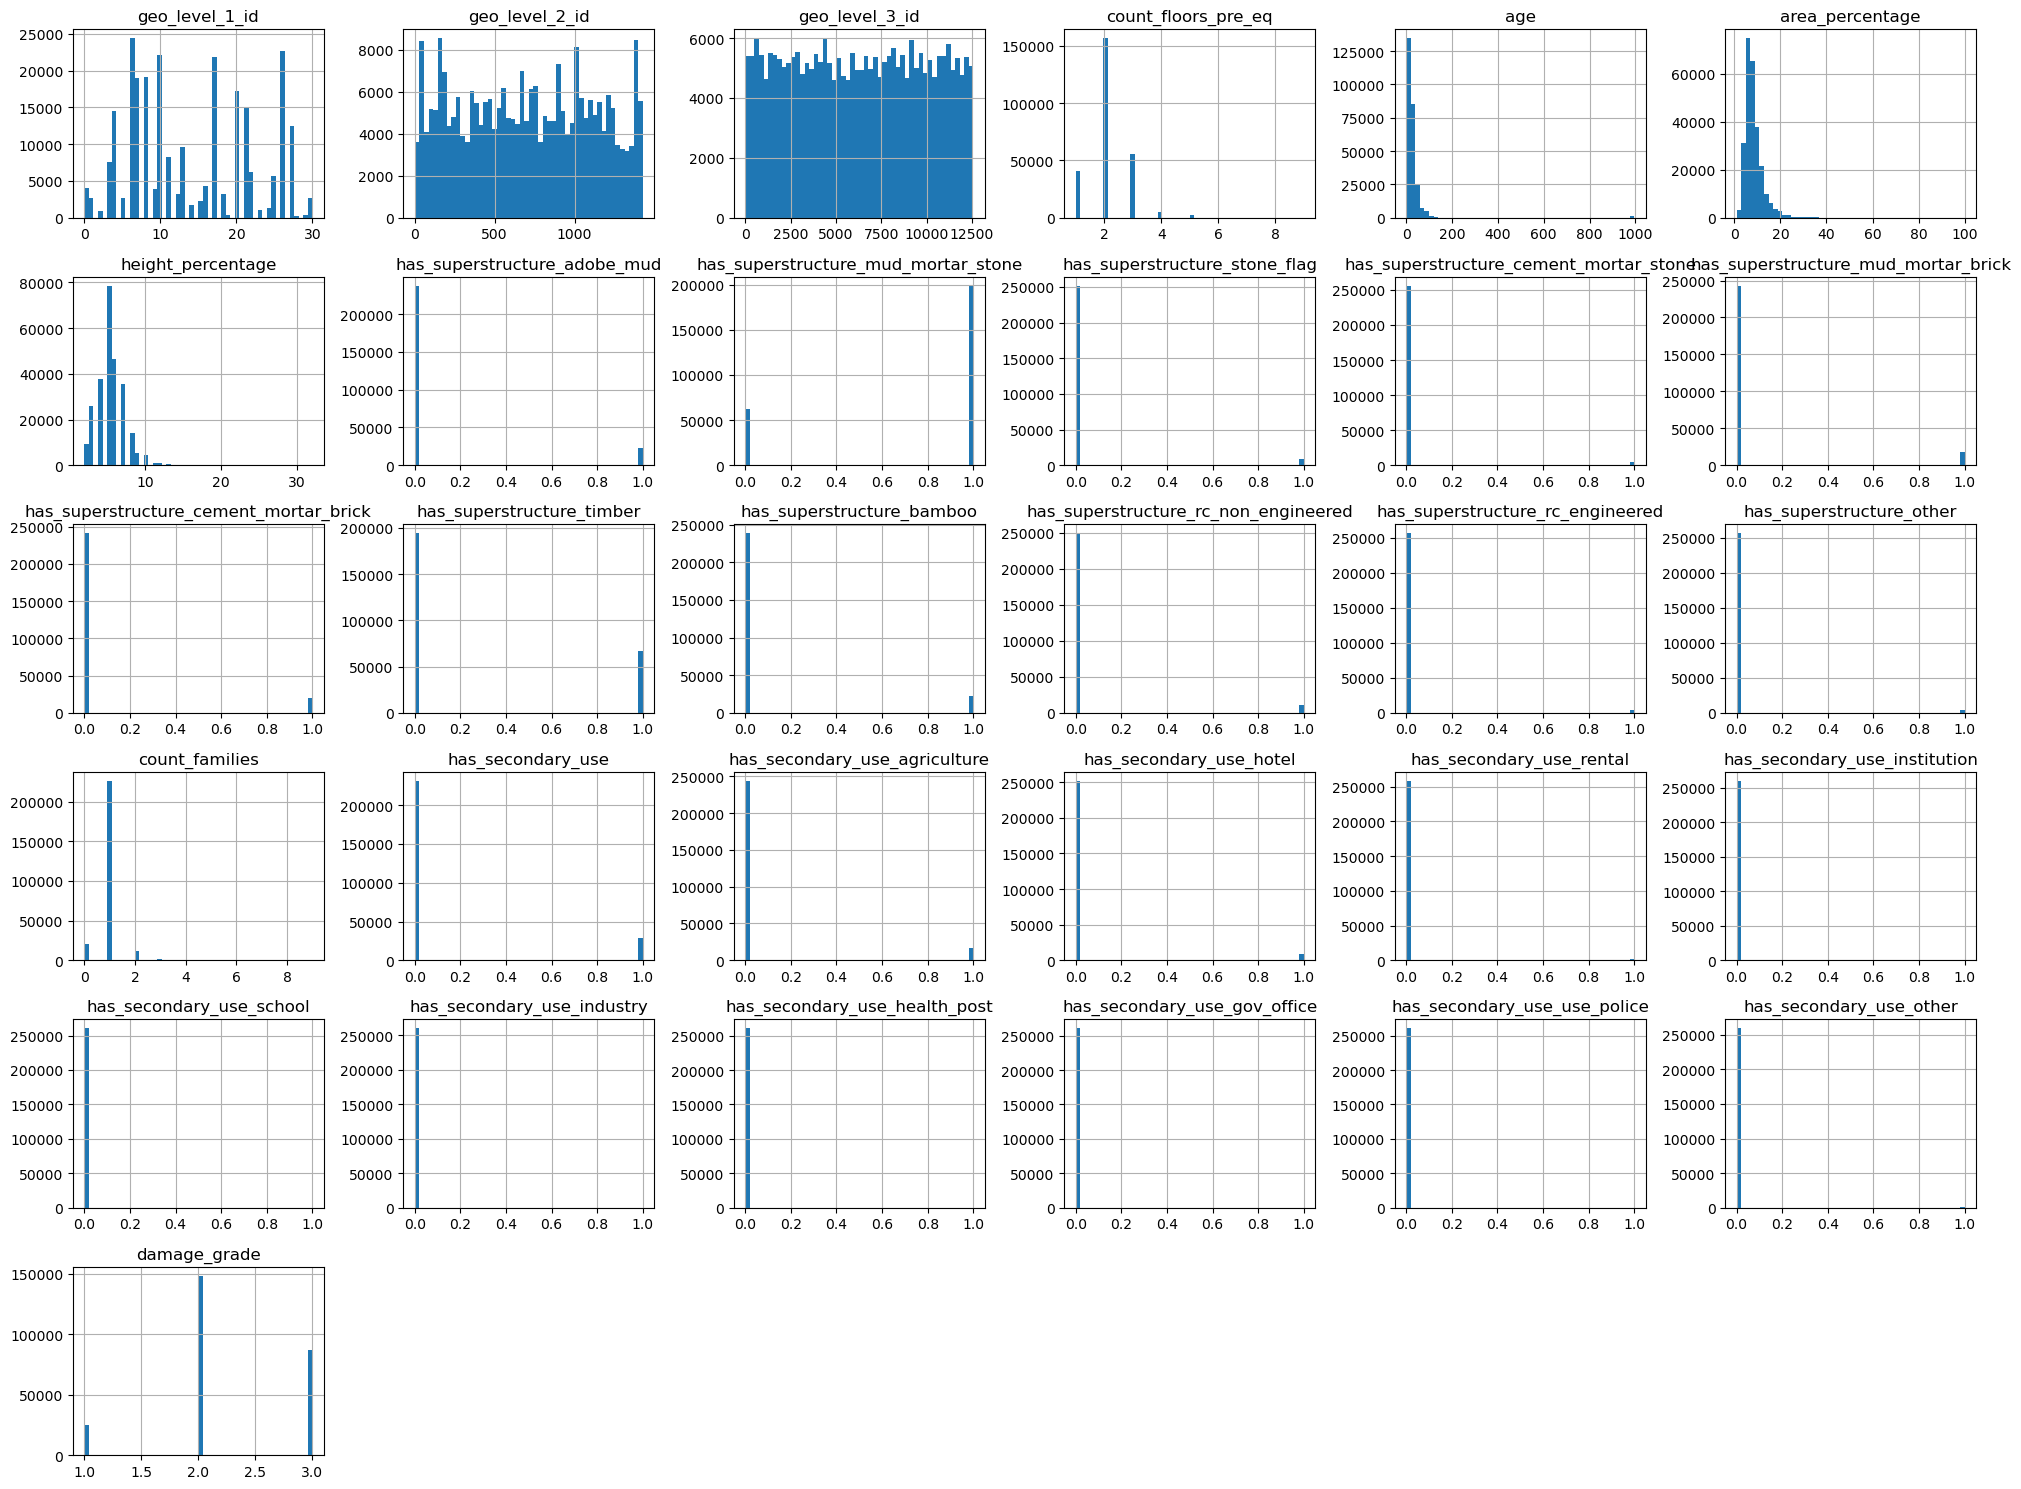

In [16]:
%matplotlib inline
earthquake_damage_df.hist(bins=50, figsize=(20,15))
save_fig("attribute_histogram_plots")
plt.show()

In [17]:
earthquake_damage_df.describe()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
count,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,...,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000
mean,13.900353,701.074685,6257.876148,2.129723,26.535029,8.018051,5.434365,0.088645,0.761935,0.034332,...,0.033626,0.008101,0.000940,0.000361,0.001071,0.000188,0.000146,0.000088,0.005119,2.238272
std,8.033617,412.710734,3646.369645,0.727665,73.565937,4.392231,1.918418,0.284231,0.425900,0.182081,...,0.180265,0.089638,0.030647,0.018989,0.032703,0.013711,0.012075,0.009394,0.071364,0.611814
min,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,7.000000,350.000000,3073.000000,2.000000,10.000000,5.000000,4.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,12.000000,702.000000,6270.000000,2.000000,15.000000,7.000000,5.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,21.000000,1050.000000,9412.000000,2.000000,30.000000,9.000000,6.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,30.000000,1427.000000,12567.000000,9.000000,995.000000,100.000000,32.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000


In [18]:
earthquake_damage_df['damage_grade'].value_counts()

damage_grade
2    148259
3     87218
1     25124
Name: count, dtype: int64

In [19]:
X = earthquake_damage_df.drop('damage_grade', axis=1).copy()
X = pd.get_dummies(X)
y = earthquake_damage_df['damage_grade'].copy()

In [20]:
# Split the data into training and testing sets
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

In [21]:
y_test.value_counts() / len(y_test)

damage_grade
2    0.568907
3    0.334683
1    0.096410
Name: count, dtype: float64

In [22]:
earthquake_damage_df['damage_grade'].value_counts() / len(earthquake_damage_df)

damage_grade
2    0.568912
3    0.334680
1    0.096408
Name: count, dtype: float64

## 3. Visualizing Geographic Data

Saving figure distribution_of_damage_grade_in_training_set


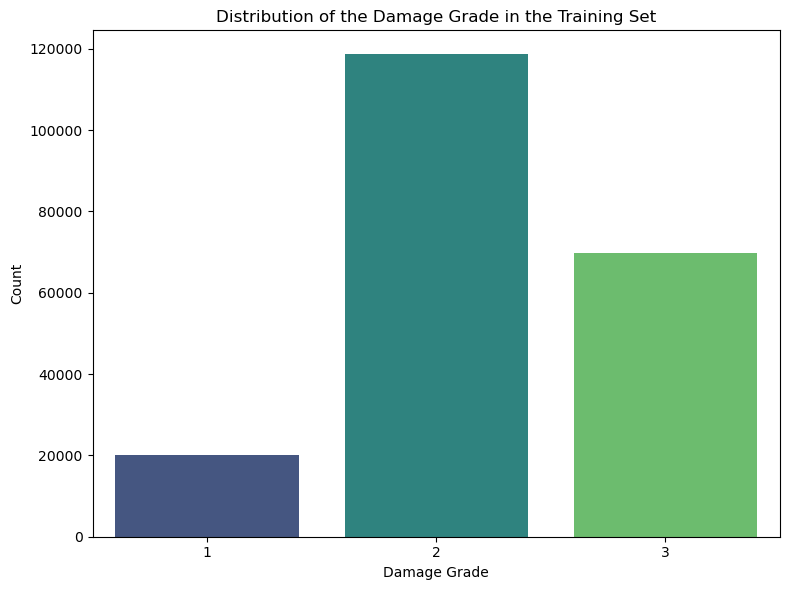

In [23]:
# Distribution of the damage grade in the training set
plt.figure(figsize=(8, 6))
sns.countplot(x=y_train, palette='viridis')
plt.title('Distribution of the Damage Grade in the Training Set')
plt.xlabel('Damage Grade')
plt.ylabel('Count')
save_fig('distribution_of_damage_grade_in_training_set')
plt.show()

Saving figure distribution_of_count_floors_pre_eq_by_damage_grade


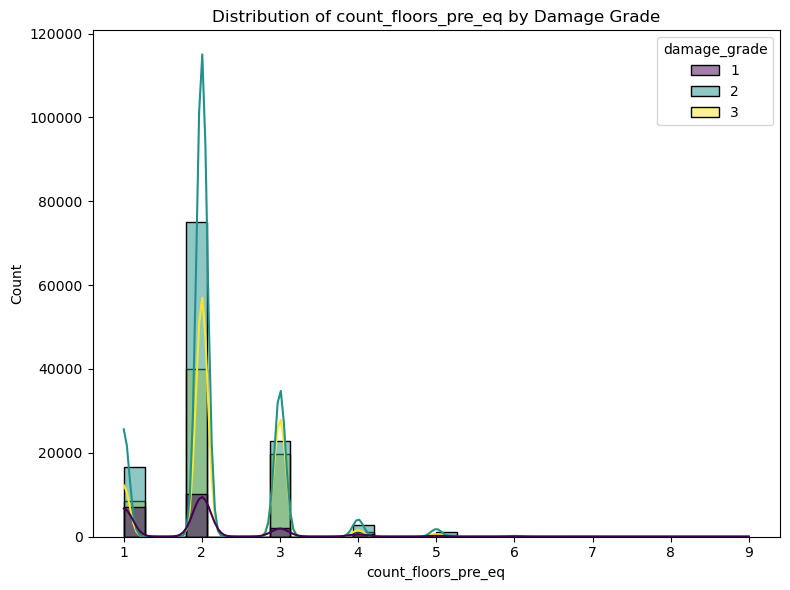

Saving figure distribution_of_age_by_damage_grade


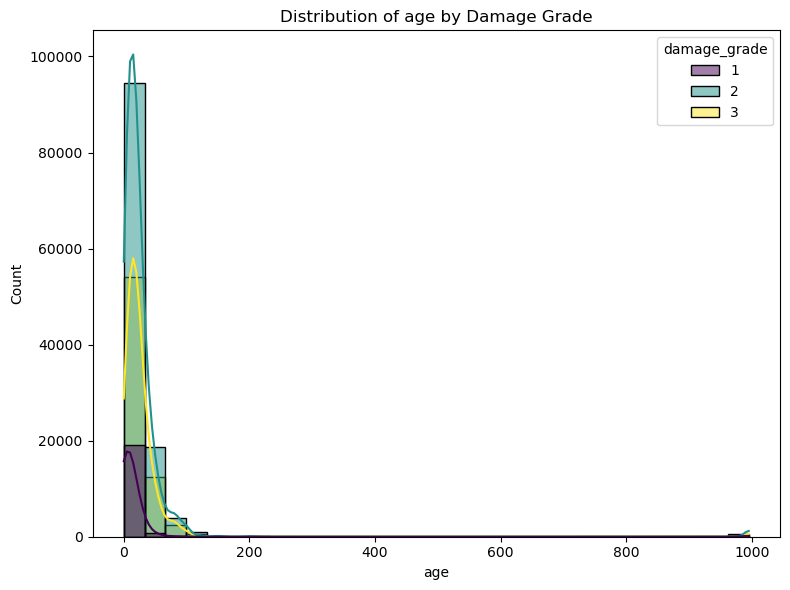

Saving figure distribution_of_area_percentage_by_damage_grade


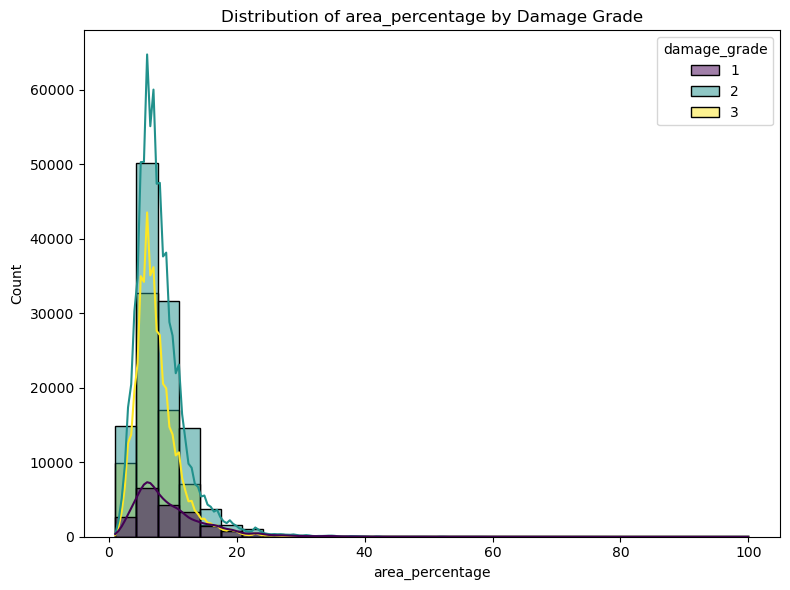

Saving figure distribution_of_height_percentage_by_damage_grade


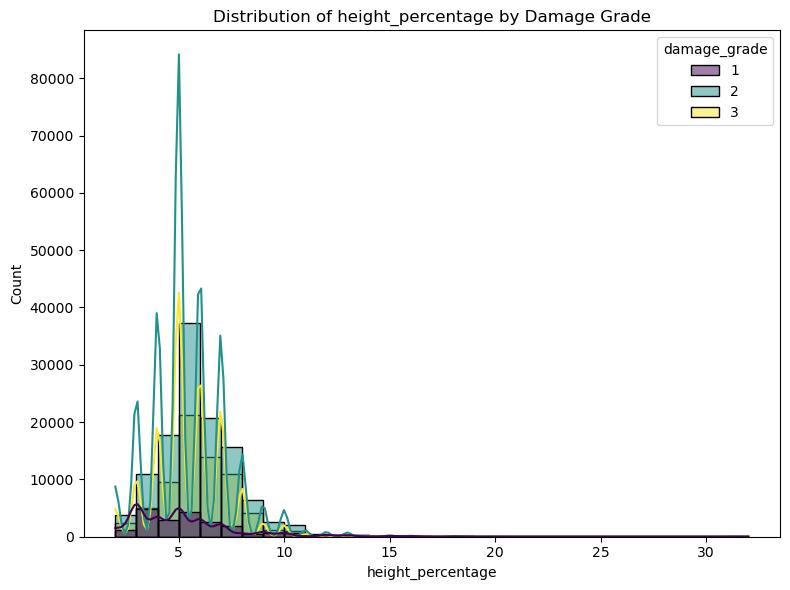

In [24]:
# Distribution of Numerical Features [except binary features]
numerical_features = ['count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage']
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=X_train, x=feature, hue=y_train, palette='viridis', kde=True, bins=30)
    plt.title(f'Distribution of {feature} by Damage Grade')
    plt.xlabel(feature)
    plt.ylabel('Count')
    save_fig(f'distribution_of_{feature}_by_damage_grade')
    plt.show()

Saving figure boxplot_of_count_floors_pre_eq_by_damage_grade


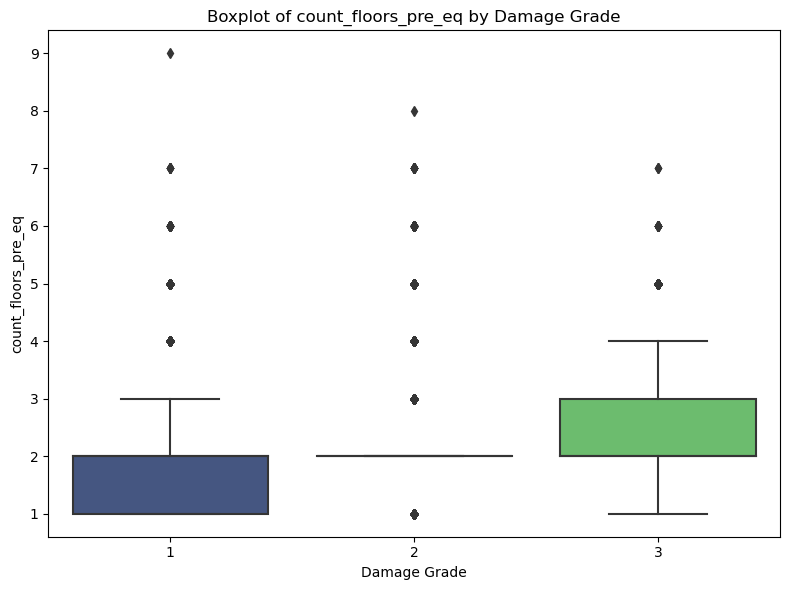

Saving figure boxplot_of_age_by_damage_grade


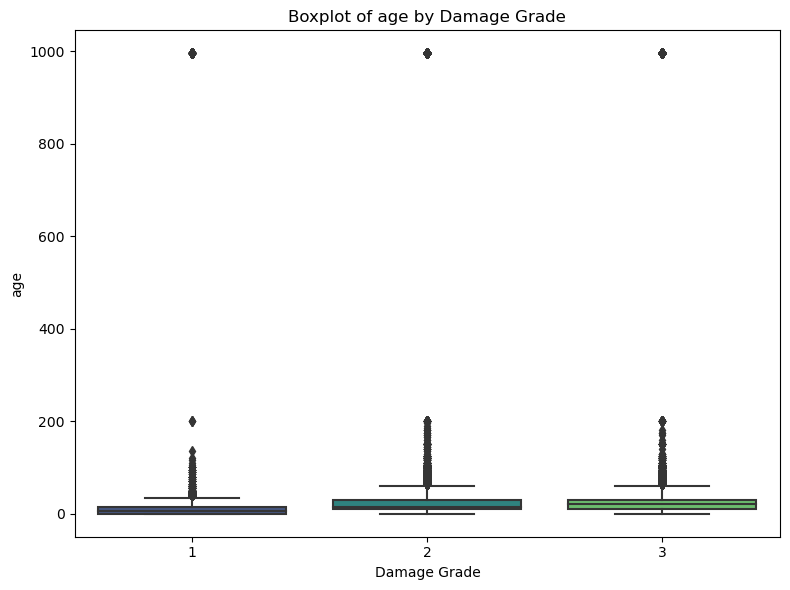

Saving figure boxplot_of_area_percentage_by_damage_grade


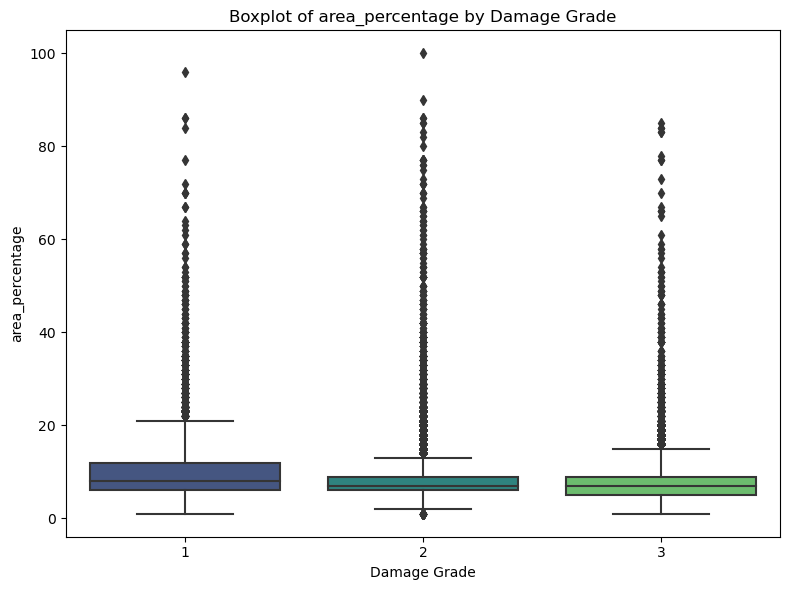

Saving figure boxplot_of_height_percentage_by_damage_grade


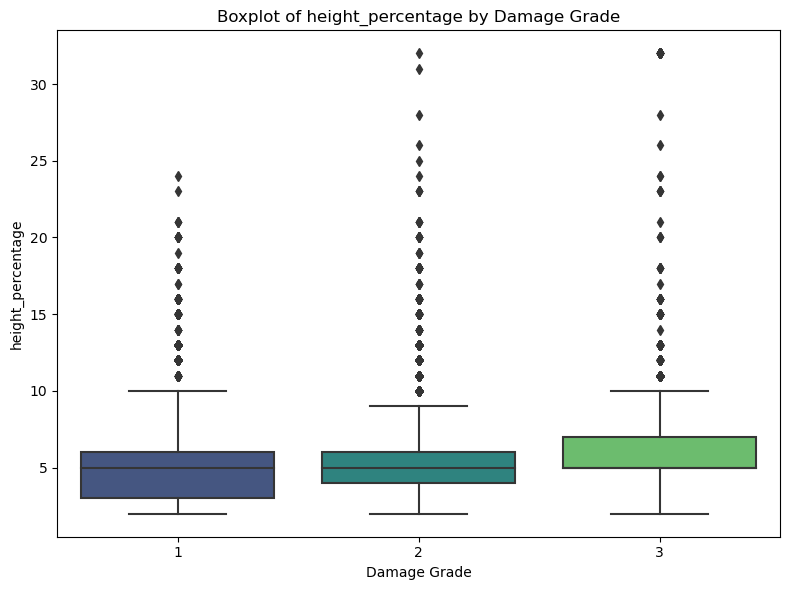

In [26]:
# Boxplot of Numerical Features [except binary features]
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=X_train, x=y_train, y=feature, palette='viridis')
    plt.title(f'Boxplot of {feature} by Damage Grade')
    plt.xlabel('Damage Grade')
    plt.ylabel(feature)
    save_fig(f'boxplot_of_{feature}_by_damage_grade')
    plt.show()

Saving figure correlation_heatmap


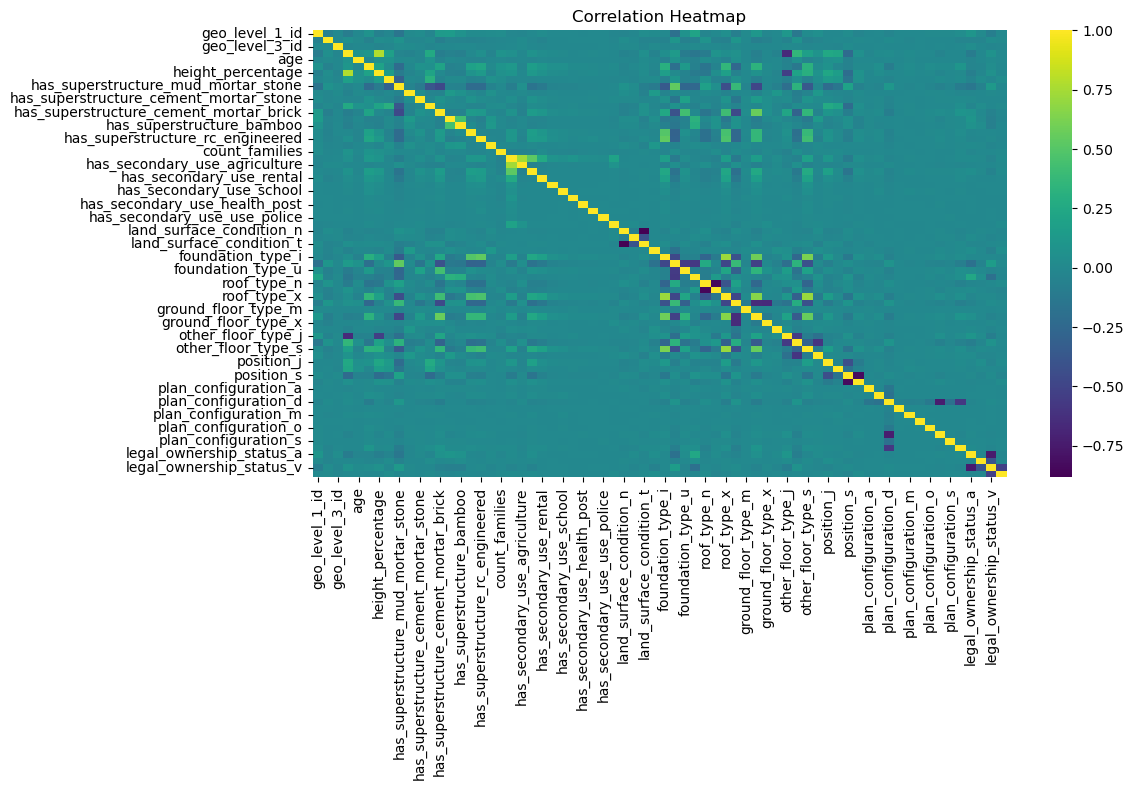

In [30]:
# Correlation Heatmap
corr_matrix = X_train.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=False, cmap='viridis')
plt.title('Correlation Heatmap')
save_fig('correlation_heatmap')

Saving figure pairplot_of_numerical_features


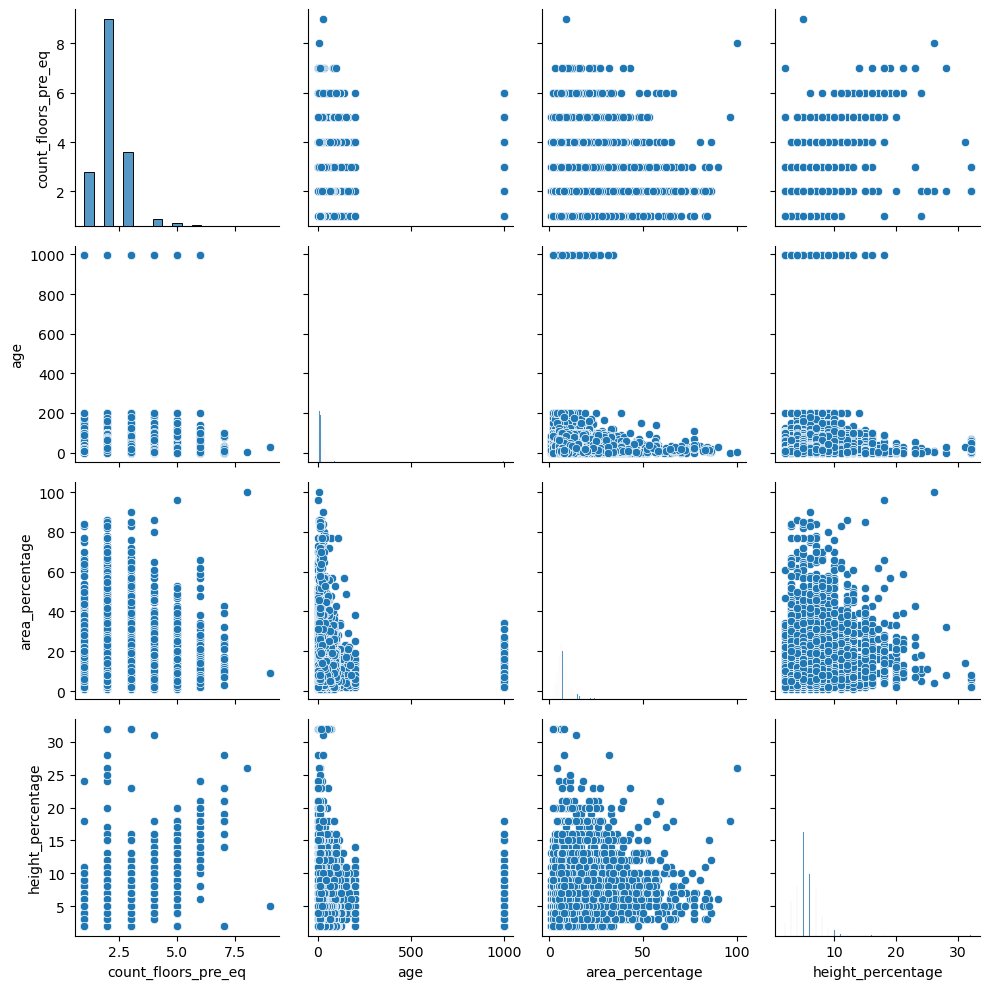

In [33]:
# Pairplot of Numerical Features
sns.pairplot(data=X_train[numerical_features])
save_fig('pairplot_of_numerical_features')
plt.show()

In [34]:
# Save the data 
X_train.to_csv('../Datasets/X_train.csv')
X_test.to_csv('../Datasets/X_test.csv')
y_train.to_csv('../Datasets/y_train.csv')
y_test.to_csv('../Datasets/y_test.csv')